In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
ip.display.set_matplotlib_formats('svg')

In [3]:
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

In [4]:
np.random.seed(20180604)

In [5]:
fair_df = sm.datasets.fair.load_pandas().data

In [6]:
fair_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
fair_df.loc[:, :'occupation_husb'].head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [8]:
(fair_df.affairs > 0).head()

0    True
1    True
2    True
3    True
4    True
Name: affairs, dtype: bool

In [9]:
X = fair_df.loc[:, :'occupation_husb']
y = fair_df.affairs > 0

In [10]:
m = ensemble.RandomForestClassifier(n_estimators=100)
m.fit(X, y)
# It will cause overfitting. Split your dataset when train a serious model!
# See http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation .

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
y_hat = m.predict(X)

In [12]:
y_hat

array([ True,  True,  True, ..., False, False, False])

In [13]:
print(metrics.classification_report(y, y_hat))
# precision = correct / all predicted positive
# recall = correct / all actual positive
# f1-score = the harmonic mean of precision and recall

              precision    recall  f1-score   support

       False       0.94      0.97      0.95      4313
        True       0.94      0.87      0.90      2053

   micro avg       0.94      0.94      0.94      6366
   macro avg       0.94      0.92      0.93      6366
weighted avg       0.94      0.94      0.94      6366



In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.4
)

In [15]:
m_2 = ensemble.RandomForestClassifier(n_estimators=100)
m_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
y_test_hat = m_2.predict(X_test)

In [17]:
print(metrics.classification_report(y_test, y_test_hat))
# precision = correct / all predicted positive
# recall = correct / all actual positive
# f1-score = the harmonic mean of precision and recall
# support = N(data which are that label)

              precision    recall  f1-score   support

       False       0.75      0.82      0.78      1728
        True       0.52      0.42      0.46       819

   micro avg       0.69      0.69      0.69      2547
   macro avg       0.63      0.62      0.62      2547
weighted avg       0.67      0.69      0.68      2547



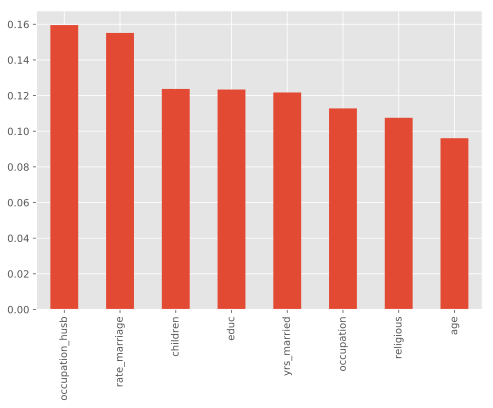

In [18]:
pd.Series(
    m_2.feature_importances_,
    index=X.columns
).sort_values(ascending=False).plot.bar()